# Chapter 2. Statistical Learning

## Exercise 10

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,.1f}'.format
import seaborn as sns
plt.style.use('notebook')
%matplotlib notebook

In [2]:
filename = '../data/boston.csv'
boston_df = pd.read_csv(filename, index_col=0)
boston_df.dropna(inplace=True)

### Data description

The Boston data frame has 506 rows and 14 columns. This data frame contains the following columns:

 - **crim**: per capita crime rate by town.

 - **zn**: proportion of residential land zoned for lots over 25,000 sq.ft.

 - **indus**: proportion of non-retail business acres per town.

 - **chas**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

 - **nox**: nitrogen oxides concentration (parts per 10 million).

 - **rm**: average number of rooms per dwelling.

 - **age**: proportion of owner-occupied units built prior to 1940.

 - **dis**: weighted mean of distances to five Boston employment centres.

 - **rad**: index of accessibility to radial highways.

 - **tax**: full-value property-tax rate per \$10,000.

 - **ptratio**: pupil-teacher ratio by town.

 - **black**: $1000*(B_k - 0.63)^2$ where $B_k$ is the proportion of blacks by town.

 - **lstat**: lower status of the population (percent).

 - **medv**: median value of owner-occupied homes in \$1000s.

In [3]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.0,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296,15.3,396.9,5.0,24.0
2,0.0,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242,17.8,396.9,9.1,21.6
3,0.0,0.0,7.1,0,0.5,7.2,61.1,5.0,2,242,17.8,392.8,4.0,34.7
4,0.0,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222,18.7,394.6,2.9,33.4
5,0.1,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222,18.7,396.9,5.3,36.2


In [4]:
boston_df.shape

(506, 14)

In [5]:
boston_df.isna().any()

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
black      False
lstat      False
medv       False
dtype: bool

In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [7]:
boston_df.tail()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
502,0.1,0.0,11.9,0,0.6,6.6,69.1,2.5,1,273,21.0,392.0,9.7,22.4
503,0.0,0.0,11.9,0,0.6,6.1,76.7,2.3,1,273,21.0,396.9,9.1,20.6
504,0.1,0.0,11.9,0,0.6,7.0,91.0,2.2,1,273,21.0,396.9,5.6,23.9
505,0.1,0.0,11.9,0,0.6,6.8,89.3,2.4,1,273,21.0,393.4,6.5,22.0
506,0.0,0.0,11.9,0,0.6,6.0,80.8,2.5,1,273,21.0,396.9,7.9,11.9


In [8]:
boston_df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [9]:
df = boston_df
for name in df.columns:
    print("{0:s}: mean {1:.2f}, sem {2:.2f}, min {3:.2f}, max {4:.2f}"\
          .format(name.title(), df[name].mean(), df[name].sem(), df[name].min(), df[name].max()))

Crim: mean 3.61, sem 0.38, min 0.01, max 88.98
Zn: mean 11.36, sem 1.04, min 0.00, max 100.00
Indus: mean 11.14, sem 0.30, min 0.46, max 27.74
Chas: mean 0.07, sem 0.01, min 0.00, max 1.00
Nox: mean 0.55, sem 0.01, min 0.39, max 0.87
Rm: mean 6.28, sem 0.03, min 3.56, max 8.78
Age: mean 68.57, sem 1.25, min 2.90, max 100.00
Dis: mean 3.80, sem 0.09, min 1.13, max 12.13
Rad: mean 9.55, sem 0.39, min 1.00, max 24.00
Tax: mean 408.24, sem 7.49, min 187.00, max 711.00
Ptratio: mean 18.46, sem 0.10, min 12.60, max 22.00
Black: mean 356.67, sem 4.06, min 0.32, max 396.90
Lstat: mean 12.65, sem 0.32, min 1.73, max 37.97
Medv: mean 22.53, sem 0.41, min 5.00, max 50.00


In [10]:
col1 = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age']
col2 = ['dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

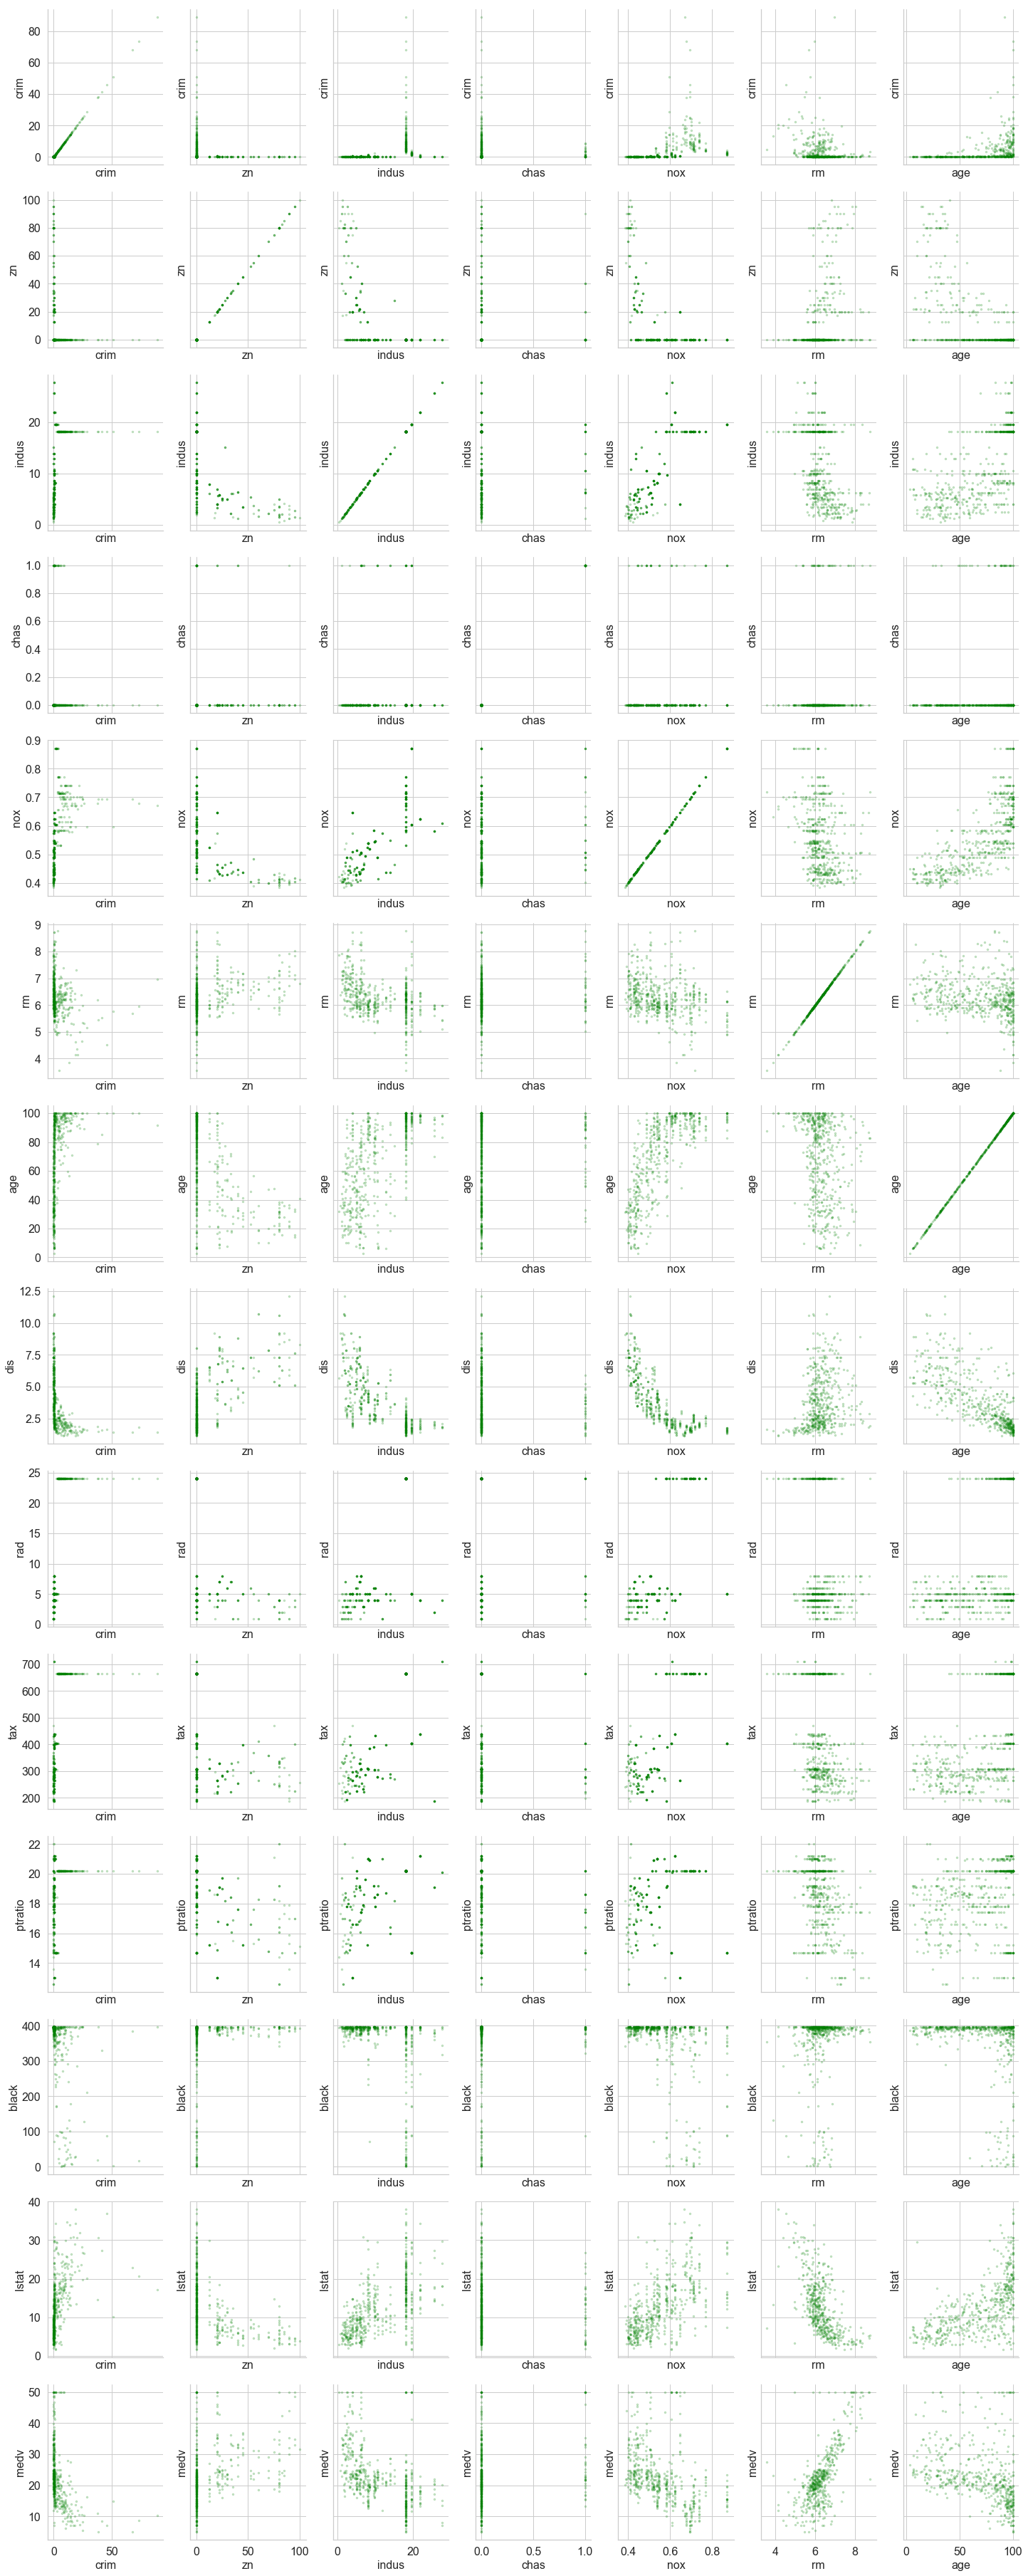

In [11]:
sns.set(style="whitegrid", color_codes=True)
df = boston_df
g = sns.PairGrid(df, x_vars=col1, y_vars=list(df.columns.values), height=3.6, aspect=0.8)
g = g.map(plt.scatter, s=6, color='green', alpha=0.2)
xlabels, ylabels = [], []
label_font_size = 16

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j, i].xaxis.set_label_text(xlabels[i])
        g.axes[j, i].xaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
        g.axes[j, i].yaxis.set_label_text(ylabels[j])
        g.axes[j, i].yaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

plt.tight_layout();

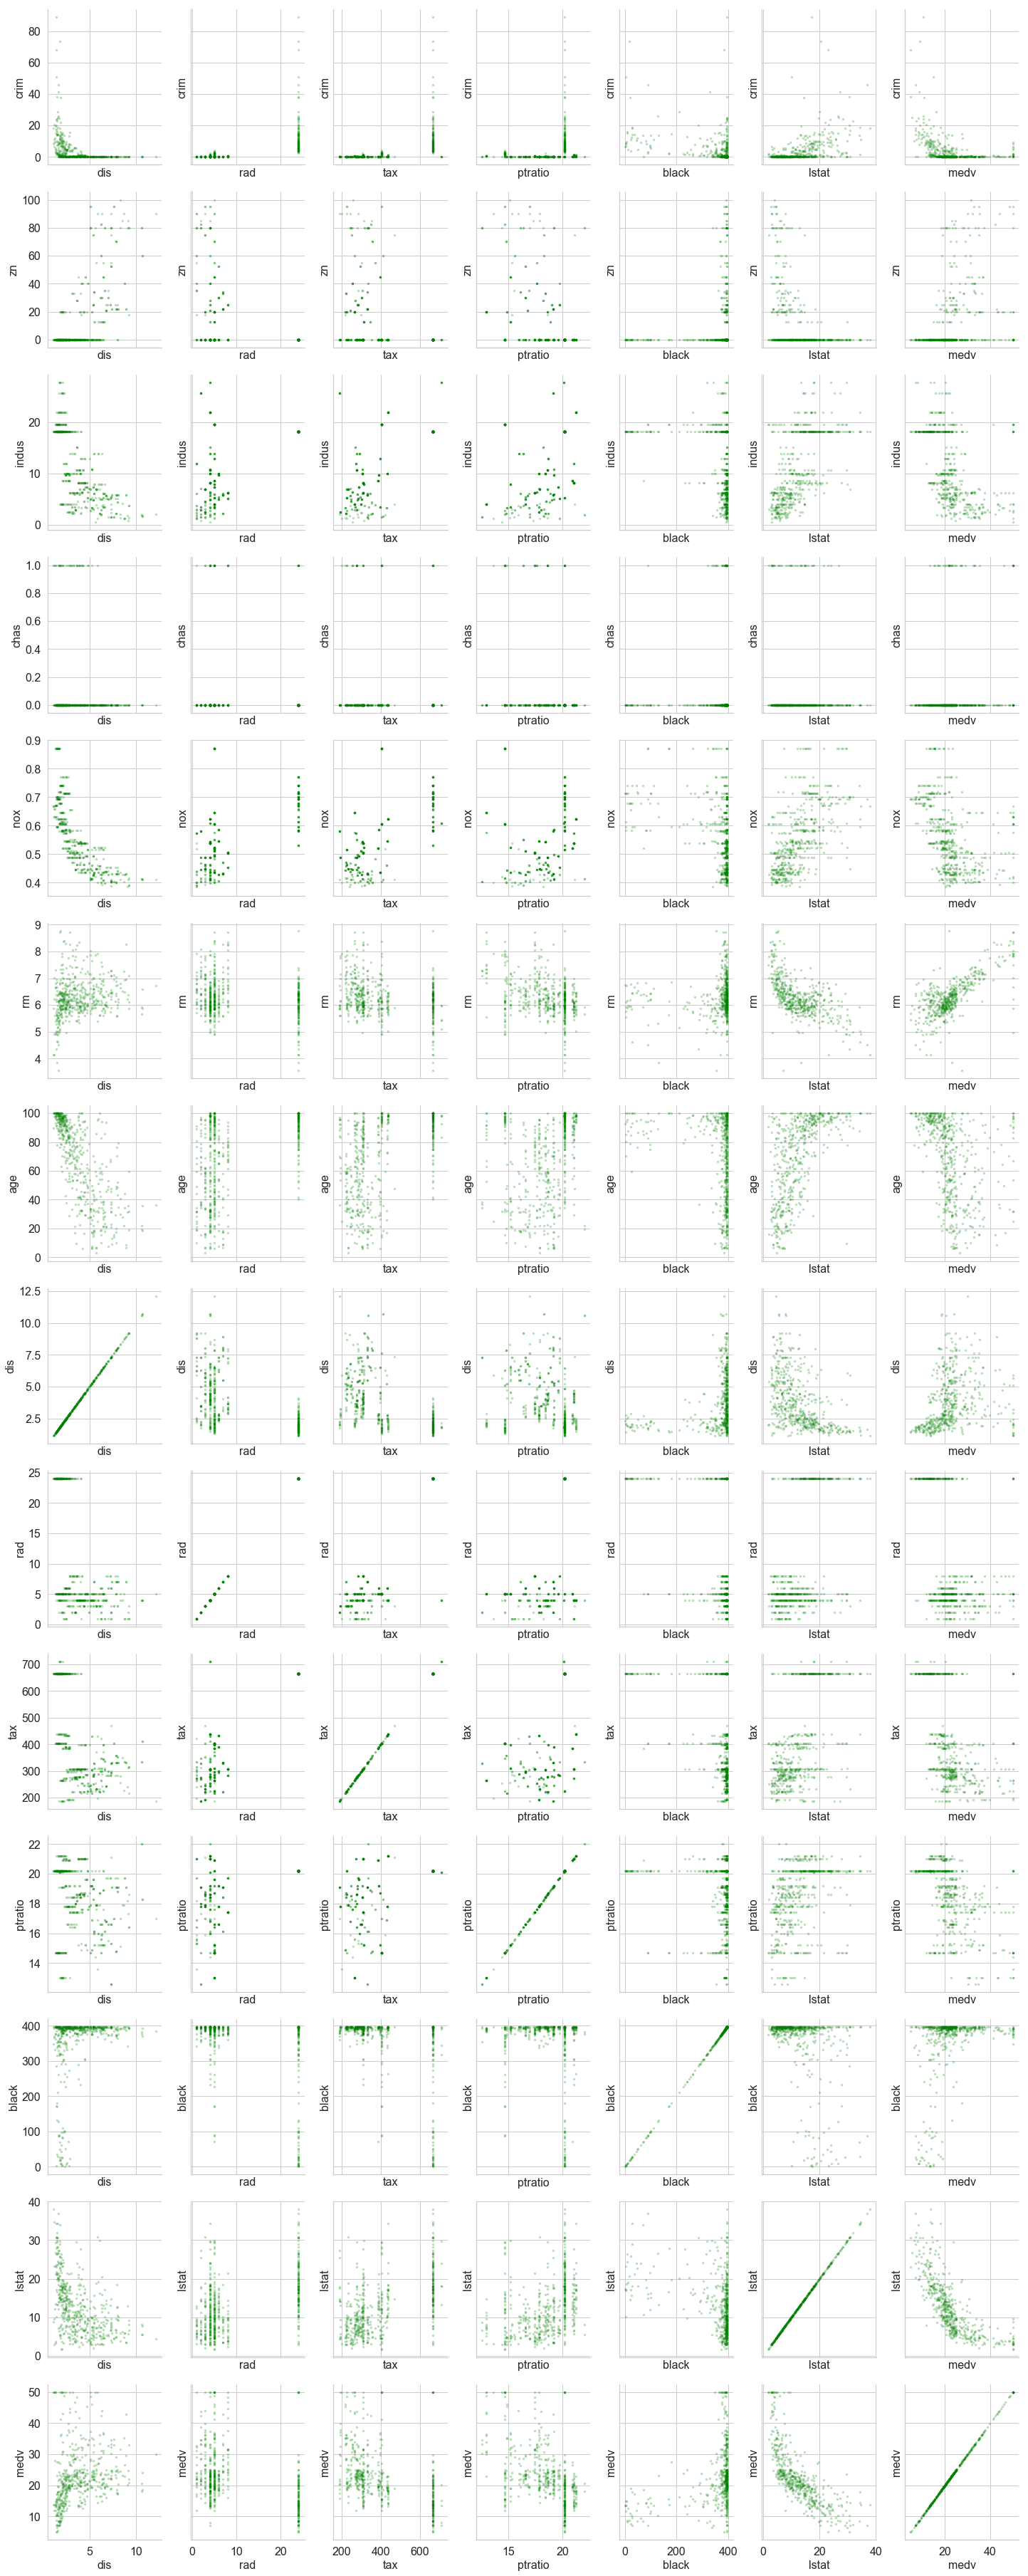

In [12]:
sns.set(style="whitegrid", color_codes=True)
df = boston_df
g = sns.PairGrid(df, x_vars=col2, y_vars=list(df.columns.values), height=3.6, aspect=0.8)
g = g.map(plt.scatter, s=6, color='green', alpha=0.2)
xlabels, ylabels = [], []
label_font_size = 16

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j, i].xaxis.set_label_text(xlabels[i])
        g.axes[j, i].xaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='x', which='major', labelsize=label_font_size)
        g.axes[j, i].yaxis.set_label_text(ylabels[j])
        g.axes[j, i].yaxis.label.set_size(label_font_size)
        g.axes[j, i].tick_params(axis='y', which='major', labelsize=label_font_size)

plt.tight_layout();

In [13]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.0,18.0,2.3,0,0.5,6.6,65.2,4.1,1,296,15.3,396.9,5.0,24.0
2,0.0,0.0,7.1,0,0.5,6.4,78.9,5.0,2,242,17.8,396.9,9.1,21.6
3,0.0,0.0,7.1,0,0.5,7.2,61.1,5.0,2,242,17.8,392.8,4.0,34.7
4,0.0,0.0,2.2,0,0.5,7.0,45.8,6.1,3,222,18.7,394.6,2.9,33.4
5,0.1,0.0,2.2,0,0.5,7.1,54.2,6.1,3,222,18.7,396.9,5.3,36.2


In [14]:
boston_df.loc[boston_df['chas'] == 1].shape

(35, 14)

In [15]:
boston_df.loc[boston_df['medv'] == boston_df['medv'].min()]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
399,38.4,0.0,18.1,0,0.7,5.5,100.0,1.5,24,666,20.2,396.9,30.6,5.0
406,67.9,0.0,18.1,0,0.7,5.7,100.0,1.4,24,666,20.2,385.0,23.0,5.0
